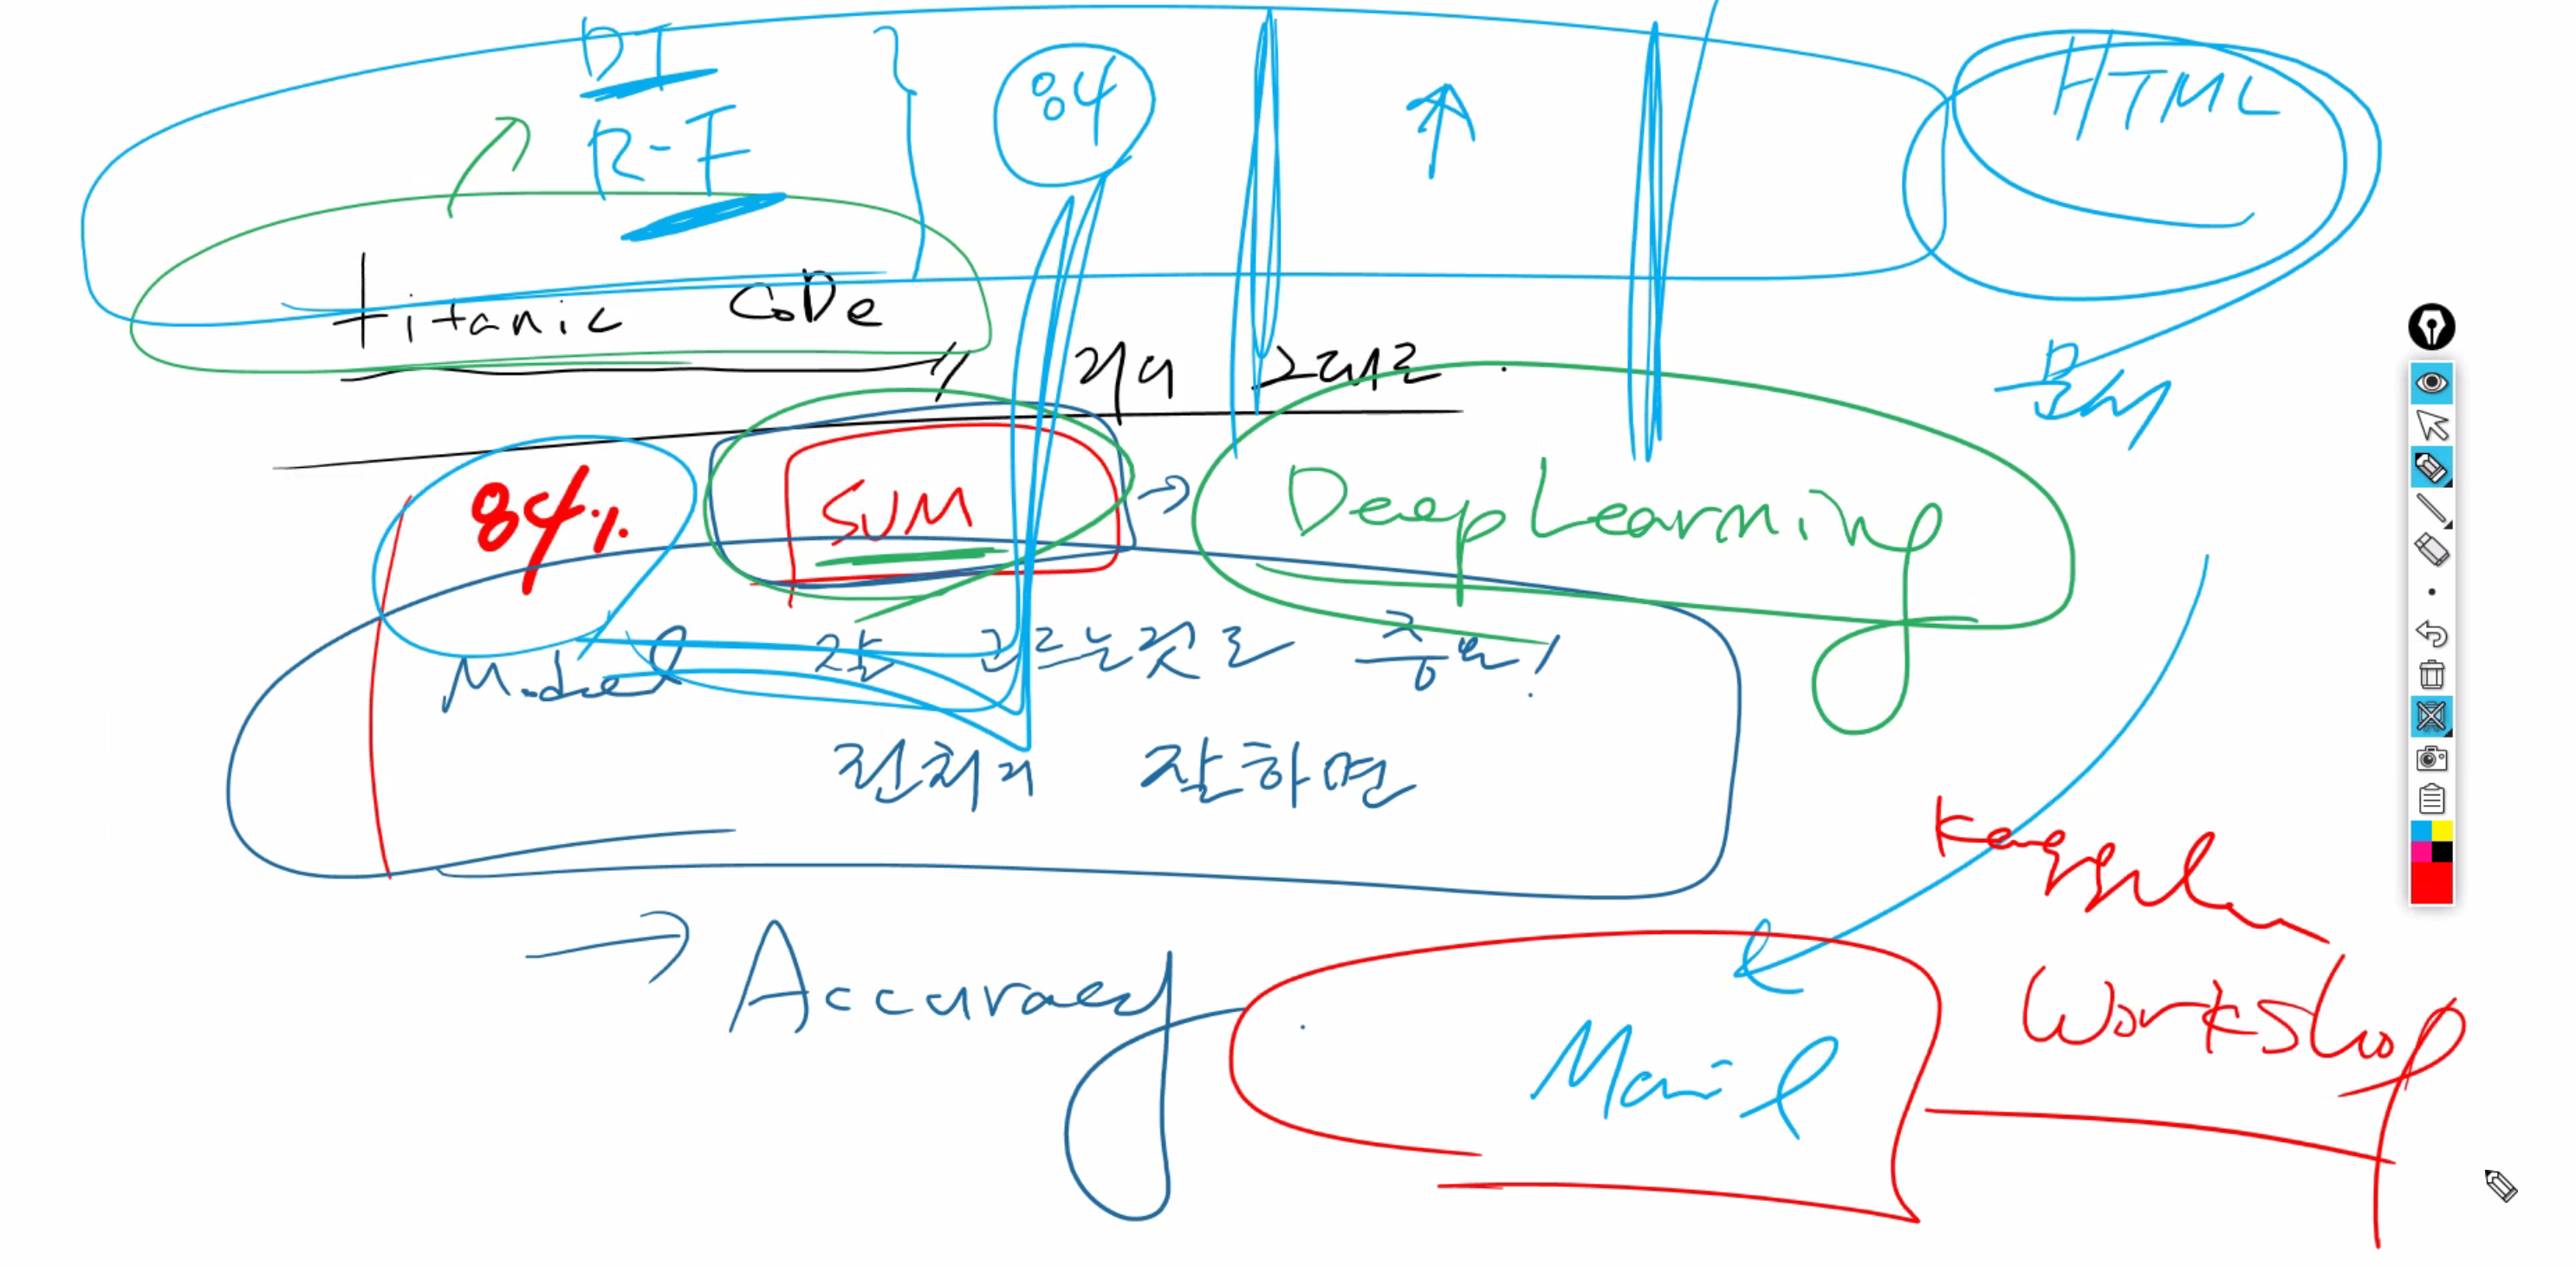

설명 : Support vector machine, SVM은 정말 좋은 함수이다. 
그래서 제법 정확도 점수가 높게 나온다..

Decision Tree, Random Forest를 사용할때 정확도 점수가 낮게 나올 것이다. SVM의 점수와 비슷하게만 나와도 잘 나온것... 하지만 전처리를 더 잘하면 점수는 더 높게 나올 것이다~!~! 전처리는 가장 중요한 절차이므로 세심하고 논리있게 짜면 좋을것이다.

# 목적
    타이타닉 해상사고 당시의 기록을 담아둔 Encyclopedia Titanica의 데이터를 참고하여, 유사한 해상 사고가 발생했을 시 어떤 승객이 생존하며, 또한 어떤 승객이 사망하는지를 예측하는 예측 모델을 만드는 것.

#### Feature Description

* Survival - 생존 여부. 0이면 사망, 1이면 생존한 것으로 간주합니다.
* Pclass - 티켓 등급. 1등석(1), 2등석(2), 3등석(3)이 있으며, 1등석일수록 좋고 3등석일수록 좋지 않습니다.
* Sex - 성별. 남자(male)와 여자(female)이 있습니다.
* Age - 나이입니다. 틈틈히 빈 값이 존재하며, 소수점 값도 존재합니다.
* SibSp - 해당 승객과 같이 탑승한 형재/자매(siblings)와 배우자(spouses)의 총 인원 수입니다.
* Parch - 해당 승객과 같이 탑승한 부모(parents)와 자식(children)의 총 인원 수입니다.
* Ticket - 티켓 번호입니다. 다양한 텍스트(문자열)로 구성되어 있습니다.
* Fare - 운임 요금입니다. 소수점으로 구성되어 있습니다.
* Cabin - 객실 번호입니다. 많은 빈 값이 존재하며, 다양한 텍스트(문자열)로 구성되어 있습니다.
* Embarked - 선착장입니다. C는 셰르부르(Cherbourg)라는 프랑스 지역, Q는 퀸스타운(Queenstown)이라는 영국 * * 지역, S는 사우스햄튼(Southampton)이라는 영국 지역입니다.

# 1. Load Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [3]:
print(train.shape)
print(test.shape)
print(train.info())
print(test.info()) # Survived feature 빠짐.

(891, 12)
(418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null

# 2. Explore 
    Feature Engineering

### Pclass    
    하나의 속성에 따른 승객본인의 생존여부.
    등석에 따라서 생존여부를 알아본다.

In [4]:
survived = train.loc[train['Survived']==1, 'Pclass'].value_counts(sorted)
survived

1    0.397661
3    0.347953
2    0.254386
Name: Pclass, dtype: float64

In [5]:
dead = train.loc[train['Survived'] == 0 , 'Pclass'].value_counts(sorted)
dead

3    0.677596
2    0.176685
1    0.145719
Name: Pclass, dtype: float64

In [6]:
df = pd.DataFrame([survived, dead], index=['Survived','Dead'])
df

,1,2,3
Survived,0.397661,0.254386,0.347953
Dead,0.145719,0.176685,0.677596


    살아남은 사람의 1 ~ 3등석을 비교해봤을때 무의미하다고 생각함. 이유는 3등석의 사람들이 2등석의 사람들 보다 많이 살아 남았기 때문이다. 비율적으로 봐도 거의 비슷하다.
    
    그렇다면 죽은 사람들의 수는 Pclass와 연관이 있다고 볼 수 있냐?
    - 있다. 왜냐하면 3등석의 사람들이 압도적으로 많이 죽었기 때문이다.
    
    결론 feature Pclass는 Survived와 연관이 있나?
    - 어느정도는 있지만 많이 있다고 보기 힘듦.
    
    그렇다면 Survived컬럼에서도 Dead한 사람들의 데이터를 다른 특징과 비교분석 해보자.

In [7]:
# 바 차트를 이용해 시각적으로 비교해보자. 
def bar_chart_survived (feature):
    survived = train.loc[train['Survived']==1, feature].value_counts()
    dead = train.loc[train['Survived']==0, feature].value_counts()
    df = pd.DataFrame([survived,dead], index=['Survived', 'Dead'])
    df.plot(kind='bar', figsize=(6,6))
    plt.show()

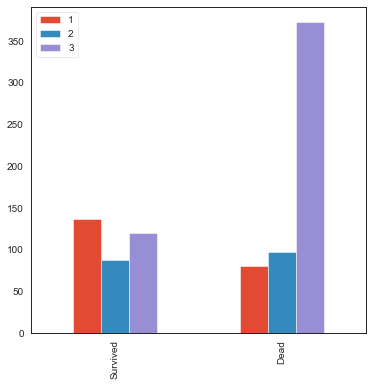

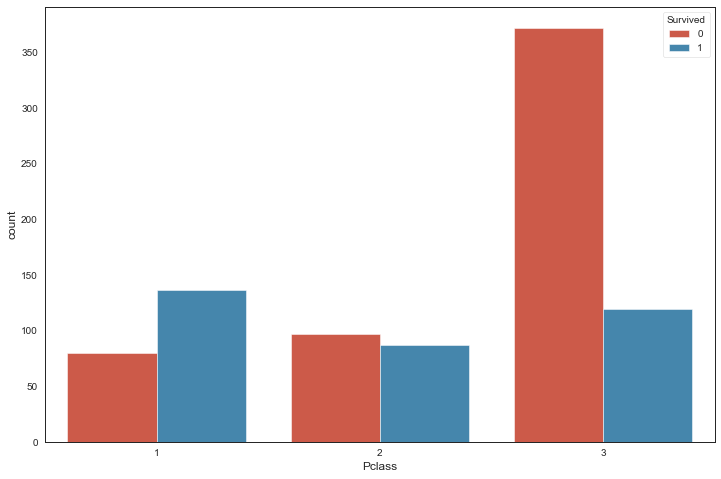

In [8]:
bar_chart_survived("Pclass")
sns.countplot(data=train, x="Pclass", hue="Survived")
plt.show()

차트를 이용해서 보면 위에서 언급했던것과 같이  
Dead는 연관이 있어 보이지만,  
Survived는 상대적으로 Dead에 비해 연관성이 떨어진다.

In [9]:
def bar_chart_dead (feature):
    dead = train.loc[train['Survived']==0, feature].value_counts()
    df = pd.DataFrame([dead], index=['Dead'])
    df.plot(kind='bar', figsize=(6,6))
    plt.show()

In [10]:
# 각각의 데이터 퍼센트를 확인할떄 좋은 데이터이다.
pd.pivot_table(train, index="Pclass", values="Survived")

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [11]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

In [12]:
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

# 결론

    분석 결과 객실 등급(Pclass)이 높을수록 생존률이 높다는 사실을 알 수 있었고, 특히나 객실 등급(Pclass)이 2등급인 경우 생존률이 1/2(50%), 3등급인 경우 생존률이 1/4(25%)도 되지 않는다는 사실을 발견할 수 있습니다.
    
    하지만,
    사진을 보면 알수 있다 시피 배가 가라 앉을때에는 뒷부분부터 주저 앉으면서 가라 앉았다. 그렇기 때문에 3등석인 분들이 쉬고있거나 잠을 자고 있을때 사망했을 가능성이 있다. 이유는 살아남은 사람들의 평균 비율을 봤을땐 1.1:0.8:1 로 대략 비슷한 수치들이 나왔기 때문이다. 
    예측한 결과를 검색해보면, 
    
    - 검색 결과 자료 -
    1912년 4월 14일 오후 11시 40분(선내 시각, GMT -3)빙산과 충돌하였고 이 때문에 주갑판이 함몰되면서 우현에 구멍이 났다. 구멍으로 물이 들어오기 시작한 지 2시간 40분만에 완전히 침수되어 침몰하였다.
    
    구명정에 타지 못한 채 바다로 뛰어든 수많은 사람들은 수 분 내에 저체온증으로 사망하였다. 침몰할 당시까지도 배에는 1,000여명의 사람들이 남아 있었다. 구명정을 타고 있다가 몇 시간 뒤에 RMS 카르파티아(RMS Carpathia)에 의해 구조된 사람은 706명에 불과하였다.
    
    위와같은 결과물이 나오는데 2시간 40분만에 완전히 침수되었다는건 매우 빠르게 침몰했다는 것이고 더해서 침몰할 당시 뒷쪽부분부터 침몰했으므로 뒷부분에 위치하는 3등석은 1시간째 안되었을때 가라앉았음을 알수 있다, 또한 갑판에 물이 들어오기 시간한 시간을 기준으로 했으므로 승객들은 물이 들어 왔는지도 몰랐을 수도 있다는것을 감안해야한다.
    
    또한, "저체온증으로 사망", "1000여명 >(몇 시간뒤)> 706" 의 자료를 봤을때 Pclass에서는 죽은 사람들의 비중을 봤을때에만 연관성이 높다고 볼수 있다. 생각했을 경우 이유는 다양하다... 
    1. 저체온증으로 사망했을 경우는 뒷부분부터 가라 앉았으니 그만큼 빨리 바닷물을 접촉했을것이고
    2. 갑판으로 올라와 배의 앞부분으로 올라가기위해 가다가 배가 기울어지니 중간에 매달려 있다가 배가 가라 앉으면서 바닷물을 먼저 접촉했거나...
    3. 먼저 물이 신체에 닿았으니 구조되는 시간동안 버티기도 그만큼 힘들었을 것이다.
    
    
    결론 - feature Survived의 죽은사람의 데이터와  Pclass의 3등급의 데이터의 연관성이 매우 높다는 것을 알 수 있다.
    

### Fare
    위의 결론에서 알아보면 Pclass의 3등급은 다른 클래스에 비해서 가격이 적을 것이다. 
    그렇다면 Fare운임요금과 사람들의 죽음에 연관성이 있을것이다.
    한번 알아보자.

In [13]:
# 군집도를 보고 대략 가격대와 클라스를 유추 해볼수 있다.
train['Fare'].value_counts().head(10)

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
10.5000    24
7.9250     18
7.7750     16
0.0000     15
26.5500    15
Name: Fare, dtype: int64

In [14]:
train['Fare'].value_counts().tail(10)

4.0125     1
7.8875     1
32.5000    1
6.4375     1
8.3000     1
50.4958    1
13.8583    1
8.4583     1
7.7250     1
7.5208     1
Name: Fare, dtype: int64

    1등급 = 20달러이상(26달러이지만 할인율 적용가 20.8 달러 이므로 20부터)
    2등급 = 10달러(20퍼센트 할인들어감) ~ 14달러(13인데 1추가 여윳값)
    3등급 = 9달러이하 (7.75가 할인 받은 가격이라고 생각함. 이유는 3등급이면서 할인 까지 받으려고 생각 하는 사람이 많음 즉, 가난하기 때문 그래서 여윳값을 주었다. 예상 티켓가격은 8.05라고 생각.)

TODO : 전처리 작업하기

### Sex

    여성일수록 생존률이 높다
    이유는 아이와 여성을 먼저 구명보트에 태워서 보호했기 때문이다.
    그래서 중요한 컬럼 중 하나라고 생각한다.
    
    그렇다면 사망수와 성별을 비교해보자.

In [15]:
pd.pivot_table(train, index="Sex", values="Survived")

,Survived
Sex,
female,0.742038
male,0.188908


In [16]:
dead = train.loc[train['Survived']==0, 'Sex'].value_counts(sorted)
survived = train.loc[train['Survived']==1, 'Sex'].value_counts(sorted)
df_dead = pd.DataFrame([dead,survived], index=['Dead','Survived'])
df_dead

,male,female
Dead,0.852459,0.147541
Survived,0.318713,0.681287


In [17]:
women = train.loc[train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("살아남은 여성 %:", rate_women)

살아남은 여성 %: 0.7420382165605095


In [18]:
men = train.loc[train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("살아남은 남성 %:", rate_men)

살아남은 남성 %: 0.18890814558058924


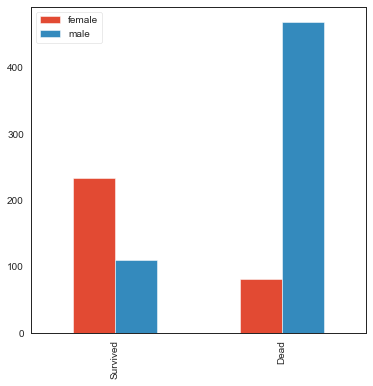

In [19]:
bar_chart_survived('Sex')

    85:15 비율로 남자의 사망률이 매우 높았던 것을 볼 수 있다.

    이로 인해
    여성일수록 생존률이 높다는 가설의 신뢰도를 높혔다고 볼 수 있다.

In [20]:
from sklearn.ensemble import RandomForestClassifier

y = train["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


### Age

    나이가 어릴수록 생존률이 높았다.
    20~30대에서는 오히려 사망률이 더 높게 측정되었다.
    이유는 어린 아이부터 구출 했기 때문이다.

In [21]:
train['Age'].value_counts().head(20) #16세 ~ 36세가 제일 많이 분포되어 있는 연령층이다.

24.0    30
22.0    27
18.0    26
28.0    25
19.0    25
30.0    25
21.0    24
25.0    23
36.0    22
29.0    20
35.0    18
32.0    18
27.0    18
26.0    18
16.0    17
31.0    17
33.0    15
34.0    15
23.0    15
20.0    15
Name: Age, dtype: int64

In [22]:
train.loc[train['Survived']==0,'Age'].value_counts().head(20) # 사망한 사람들의 비중또한 16 ~ 36세가 제일 많다.

21.0    19
28.0    18
25.0    17
18.0    17
22.0    16
19.0    16
24.0    15
30.0    15
26.0    12
20.0    12
29.0    12
16.0    11
36.0    11
23.0    10
32.0     9
34.0     9
39.0     9
31.0     9
33.0     9
47.0     8
Name: Age, dtype: int64

In [23]:
train.loc[train['Survived']==1,'Age'].value_counts().head(20) # 살아남은 사람들의 비중또한 16~36세가 많았으며, 그중 4세 40세가 껴있다.

24.0    15
36.0    11
35.0    11
27.0    11
22.0    11
30.0    10
18.0     9
19.0     9
32.0     9
31.0     8
29.0     8
28.0     7
4.0      7
33.0     6
40.0     6
25.0     6
26.0     6
16.0     6
17.0     6
34.0     6
Name: Age, dtype: int64

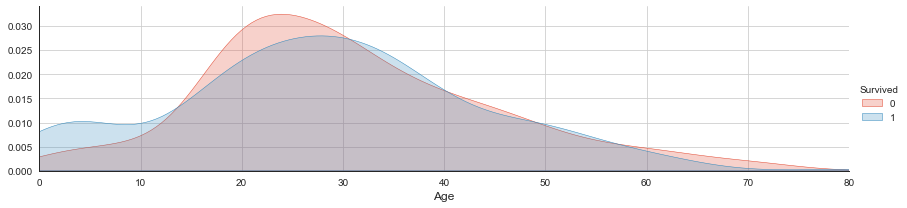

In [24]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.grid()
plt.show()

    결론. Age 컬럼은 사망과의 연관성이 떨어져 보인다. 데이터로 봤을때 가설 입증이 안된다.

### Title
    외국사람의 이름에는 항상 Mr, Miss, Mrs 단어가 붙는다
    이름만 보고도 그사람의 대강의 나이와 성별 판단이 가능하다.
    이전 분석결과를 바탕으로 밨을때, Miss일수록 생존확률이 높을 것이고. 반면에 Mr는 사망확률이 높을 것이다

In [25]:
# 데이터를 가공했다. 각 명칭에 맞게.
# train_test_data= [train, test] 
# for dataset in train_test_data:
#     dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# title_mapping = {"Mr": "Mr", "Miss": "Miss", "Mrs": "Mrs", 
#                  "Master": "etc", "Dr": "etc", "Rev": "etc", "Col": "etc", "Major": "etc", "Mlle": "etc","Countess": "etc",
#                  "Ms": "etc", "Lady": "etc", "Jonkheer": "etc", "Don": "etc", "Dona" : "etc", "Mme": "etc","Capt": "etc","Sir": "etc" }
# for dataset in train_test_data:
#     dataset['Title'] = dataset['Title'].map(title_mapping)
    
# train.drop('Name', axis=1, inplace=True)
# test.drop('Name', axis=1, inplace=True)

Miss는 결혼하지 않은 미혼여성
Ms는 미혼인지 기혼인지 모르는/알리고 싶어하지 않는 여성들을 부를대 쓰이는 호칭이다.
Mrs는 결혼한 여자를 말한다.
Mr은 남자에게 쓰이는 호칭으로 결혼상태 유무와는 관계가 없다.


In [26]:
# 차트를 보고 알 수 있는 점은 각 명칭에 따라서 생존률을 비교해 볼 수 있다.
# bar_chart_survived('Title')

우선은 데이터를 넣지 말고 삭제만 하고 실행 해보자.
데이터를 가공해서 만들어서 가족의 크기도 넣었다.  
#### Feature - Family Size

* 같이 동반한 가족의 수가 없다면 사명할 확률이 높다.
* 가족이 1명이나 2명일 경우에는 생존자가 미세하지만 조금 더 많이 나온다
* 가족이 3명일때 생존자가 더 많다.

In [27]:
# train["FamilySize"] = train["SibSp"] + train["Parch"]
# test["FamilySize"] = test["SibSp"] + test["Parch"]
# train.drop('SibSp', axis=1, inplace=True)
# test.drop('SibSp', axis=1, inplace=True)
# train.drop('Parch', axis=1, inplace=True)
# test.drop('Parch', axis=1, inplace=True)

# bar_chart_survived('FamilySize')

# 3. Preprocessing

모델을 생성해서 머신러닝(Machine Learning) 알고리즘에 넣기 위해서는(Training 과정), 데이터를 머신러닝 알고리즘이 이해할 수 있는 형태로 변환해줘야 합니다. 이 과정을 전문용어로 전처리(Preprocessing)라고 합니다.

scikit-learn 에서 제공하는 머신러닝 알고리즘에 데이터를 넣을 수 있는 기본 조건은 다음과 같습니다.

1. 불필요한 속성은 과감히 제거한다 >> 차원을 줄이는데 필수 적이다~!!

2. Fill in Missing Value(데이터에 빈 값이 없어야 한다) - 결측치 값에 대한 전략이 필요함 

3. 모든 데이터는 숫자(정수형, 소수점 등)로 구성되어 있어야 한다.  >> 문자는 숫자로 맵핑해야한다.




__타이타닉 데이터에 있는 세 컬럼(Sex, Fare, Embarked)을 전처리해 봅니다.__

#### 1. 관련없는 데이터 속성을 삭제

* Ticket  
* Cabin
* PassengerId
* drop으로. inplace = True

In [28]:
data1 = train.copy(deep = True)

In [29]:
data_cleaner = [data1, test]

In [30]:
for dataset in data_cleaner:    
    #complete missing age with median
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    #complete embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    #complete missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    
#delete the cabin feature/column and others previously stated to exclude in train dataset
drop_column = ['PassengerId','Cabin', 'Ticket']
data1.drop(drop_column, axis=1, inplace = True)

In [31]:
print(data1.isnull().sum())
print("-"*10)
print(test.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


##### Feature Engineering

In [32]:
for dataset in data_cleaner:    
    #Discrete variables
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1


    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

    #quick and dirty code split title from name: http://www.pythonforbeginners.com/dictionary/python-split
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]


    #Continuous variable bins; qcut vs cut: https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut
    #Fare Bins/Buckets using qcut or frequency bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)

    #Age Bins/Buckets using cut or value bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)

    
drop_column = ['SibSp','Parch']
data1.drop(drop_column, axis=1, inplace = True)
    
#cleanup rare title names
#print(data1['Title'].value_counts())
stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics: http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/
title_names = (data1['Title'].value_counts() < stat_min) #this will create a true false series with title name as index

#apply and lambda functions are quick and dirty code to find and replace with fewer lines of code: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(data1['Title'].value_counts())
print("-"*10)




Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------


C:\anaconda3\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\anaconda3\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [33]:
#preview data again
data1.info()
test.info()
data1.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    object  
 3   Sex         891 non-null    object  
 4   Age         891 non-null    float64 
 5   Fare        891 non-null    float64 
 6   Embarked    891 non-null    object  
 7   FamilySize  891 non-null    int64   
 8   IsAlone     891 non-null    int64   
 9   Title       891 non-null    object  
 10  FareBin     891 non-null    category
 11  AgeBin      891 non-null    category
dtypes: category(2), float64(2), int64(4), object(4)
memory usage: 72.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64 

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
215,1,1,"Newell, Miss. Madeleine",female,31.0,113.2750,C,2,0,Miss,"(31.0, 512.329]","(16.0, 32.0]"
181,0,2,"Pernot, Mr. Rene",male,28.0,15.0500,C,1,1,Mr,"(14.454, 31.0]","(16.0, 32.0]"
111,0,3,"Zabour, Miss. Hileni",female,14.5,14.4542,C,2,0,Miss,"(7.91, 14.454]","(-0.08, 16.0]"
864,0,2,"Gill, Mr. John William",male,24.0,13.0000,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
221,0,2,"Bracken, Mr. James H",male,27.0,13.0000,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
674,0,2,"Watson, Mr. Ennis Hastings",male,28.0,0.0000,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
753,0,3,"Jonkoff, Mr. Lalio",male,23.0,7.8958,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
488,0,3,"Somerton, Mr. Francis William",male,30.0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
709,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,28.0,15.2458,C,3,0,Master,"(14.454, 31.0]","(16.0, 32.0]"
53,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,26.0000,S,2,0,Mrs,"(14.454, 31.0]","(16.0, 32.0]"


In [34]:
# 트레이닝 자료에서 삭제한것은 테스트도 삭제해야한다.
# train.drop('Ticket', axis=1, inplace=True)
# test.drop('Ticket', axis=1, inplace=True) 

# train.drop('Cabin', axis=1, inplace=True)
# test.drop('Cabin', axis=1, inplace=True)

# test_PassengerId=test["PassengerId"]
# train.drop('PassengerId', axis = 1, inplace=True)
# test.drop('PassengerId', axis = 1, inplace=True)

In [35]:
from sklearn import preprocessing
label = preprocessing.LabelEncoder()

In [36]:
# #random_state -> seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
# train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state = 0)
# train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target] , random_state = 0)
# train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state = 0)


# print("Data1 Shape: {}".format(data1.shape))
# print("Train1 Shape: {}".format(train1_x.shape))
# print("Test1 Shape: {}".format(test1_x.shape))

# train1_x_bin.head()

In [37]:
# #Discrete Variable Correlation by Survival using
# #group by aka pivot table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html
# for x in data1_x:
#     if data1[x].dtype != 'float64' :
#         print('Survival Correlation by:', x)
#         print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
#         print('-'*10, '\n')
        

# #using crosstabs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html
# print(pd.crosstab(data1['Title'],data1[Target[0]]))

In [38]:
#CONVERT: convert objects to category using Label Encoder for train and test/validation dataset

#code categorical data
for dataset in data_cleaner:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])


#define y variable aka target/outcome
Target = ['Survived']

#define x variables for original features aka feature selection
data1_x = ['Sex','Pclass', 'Embarked', 'Title', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code',  'Age', 'Fare'] #coded for algorithm calculation
data1_xy =  Target + data1_x
print('Original X Y: ', data1_xy, '\n')


#define x variables for original w/bin features to remove continuous variables
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')


#define x and y variables for dummy features original
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')


Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



In [39]:
print('Train columns with null values: \n', data1.isnull().sum())
print("-"*10)
print (data1.info())
print("-"*10)

print('Test/Validation columns with null values: \n', test.isnull().sum())
print("-"*10)
print (test.info())
print("-"*10)

train.describe(include = 'all')

Train columns with null values: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Survived       891 non-null    int64   
 1   Pclass         891 non-null    int64   
 2   Name           891 non-null    object  
 3   Sex            891 non-null    object  
 4   Age            891 non-null    float64 
 5   Fare           891 non-null    float64 
 6   Embarked       891 non-null    object  
 7   FamilySize     891 non-null    int64   
 8   IsAlone        891 non-null    int64   
 9   Title         

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Roebling, Mr. Washington Augustus II",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


* Age

그룹별로 평균내서 결측값을 채운다.<br>
Mr, Miss, Mrs 그룹 사람들의 나이 평균으로 채운다.

In [40]:
# train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
# test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

* Fare

그룹별로 평균내서, 결측치 채우기<br>
1등석은 1등석끼리,2등석은 2등석끼리,3등석은 3등석끼리 평균내서 채운다 pclass로 채움.

In [41]:
# train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
# test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

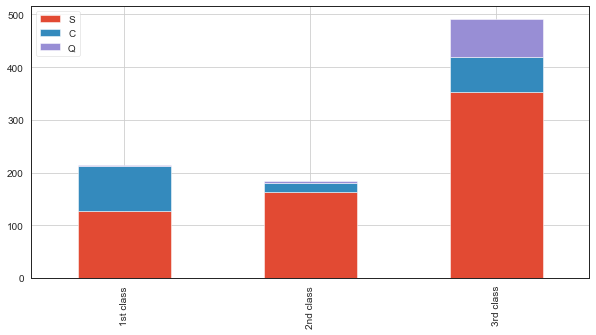

In [42]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))
plt.grid()

In [43]:
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Roebling, Mr. Washington Augustus II",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


* Embarked

1등석,2등석,3등석 모두 등석에서 표를 구매한 선착장이 S가 가장 많았다.<br>
1,2,3 등석 모두가 S선착장에서 구입한 비율이 50%를 넘어섰기 때문에 결측치값은 기본값을 S로 지정했다.

In [44]:
# 그래프의 비율에 맞게 수치를 넣어줬다.
# count = 0
# for dataset in train_test_data:
#     if  4>= count >= 0 :       
#         dataset['Embarked'] = dataset['Embarked'].fillna('S')
#         count+=1
#     elif 5>= count >= 5 :
#         dataset['Embarked'] = dataset['Embarked'].fillna('Q')
#         count+=1
#     else:
#         dataset['Embarked'] = dataset['Embarked'].fillna('C')
#         count = 0    

#### 3. 모든 데이터는 숫자(정수형, 소수점 등)로 구성되어 있어야 한다

__3-1. Binning(구간화)


Binning은 대표적인 Feature Engineering 기법 중의 하나로 숫자형 변수를 범주형 변수로 변형하는 작업이다

승객들을 해당 승객의 나이(숫자)에 따라 총 5구간으로 구분하는 작업(Binning)을 했다.

구간화(Binning)를 이용하면, <br>
(1) 이상치로 발생 가능한 문제를 완화 시켜줄 수 있고,  <br>
(2) 결측치 처리를 보다 간편하게 할 수 있습니다.  <br>
(3) 과적합을 완화 시켜주는 효과가 있고,  <br>
(4) 결과에 대한 해석이 용이하다는 장점도 있습니다. <br>
(5) Target 변수와의 관계가 비선형인 경우도 설명이 가능합니다. <br>


__3-2. Encoding__

성별 컬럼을 전처리하는 가장 쉬운 방법은 male은 0으로, female은 1로 바꿔주는 것입니다. 이를 전문 용어로 인코딩(Encoding)이라고 합니다.
여기서는 Sex, Embarked, Title 컬럼을 숫자로 매핑시켜 줍니다.

#### - Age Binning(구간화)

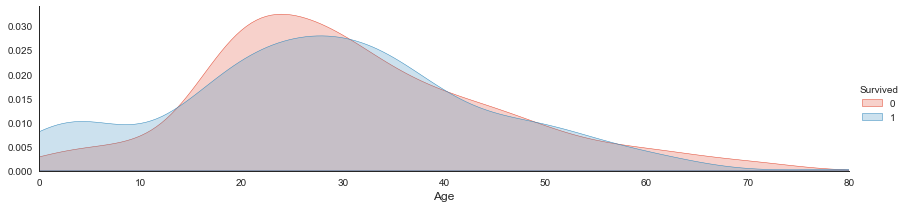

In [45]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()

plt.show()

In [46]:
# for dataset in train_test_data:
#     dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
#     dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
#     dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 45), 'Age'] = 2
#     dataset.loc[(dataset['Age'] > 45) & (dataset['Age'] <= 59), 'Age'] = 3
#     dataset.loc[ dataset['Age'] > 59, 'Age'] = 4

In [47]:
# for dataset in train_test_data:
#     dataset.loc[ dataset['Fare'] <= 9, 'Fare'] = 0
#     dataset.loc[(dataset['Fare'] > 9) & (dataset['Fare'] <= 14), 'Fare'] = 1
#     dataset.loc[(dataset['Fare'] > 14) & (dataset['Fare'] <= 20), 'Fare'] = 2
#     dataset.loc[ dataset['Fare'] > 20, 'Fare'] = 3

In [48]:
# 머신에게 학습을 시킬때는 문자열로는 학습이 안된다. 모든 값을 숫자로 매핑시킨다.
# sex_mapping = {"male": 0, "female": 1}
# for dataset in train_test_data:
#     dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [49]:
# 선착장을 숫자로 맵핑
# embarked_mapping = {"S": 0, "C": 1, "Q": 2}
# for dataset in train_test_data:
#     dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [50]:
# Title을 숫자로 맵핑
# title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, "etc": 3}
# for dataset in train_test_data:
#     dataset['Title'] = dataset['Title'].map(title_mapping)

In [51]:
# train_data = train.drop('Survived', axis=1)
# train_data

In [52]:
# train_label = train['Survived']
# train_label

In [53]:
print('Train columns with null values: \n', data1.isnull().sum())
print("-"*10)
print (data1.info())
print("-"*10)

print('Test/Validation columns with null values: \n', test.isnull().sum())
print("-"*10)
print (test.info())
print("-"*10)

train.describe(include = 'all')

Train columns with null values: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Survived       891 non-null    int64   
 1   Pclass         891 non-null    int64   
 2   Name           891 non-null    object  
 3   Sex            891 non-null    object  
 4   Age            891 non-null    float64 
 5   Fare           891 non-null    float64 
 6   Embarked       891 non-null    object  
 7   FamilySize     891 non-null    int64   
 8   IsAlone        891 non-null    int64   
 9   Title         

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Roebling, Mr. Washington Augustus II",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [54]:
#split train and test data with function defaults
#random_state -> seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target] , random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state = 0)


print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x_bin.head()

Data1 Shape: (891, 17)
Train1 Shape: (668, 6)
Test1 Shape: (223, 6)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,3,1,1,0
68,0,3,2,2,7,1,1
253,1,3,2,3,2,1,2
320,1,3,2,3,1,1,0
706,0,2,2,4,1,2,1


In [55]:
for x in data1_x:
    if data1[x].dtype != 'float64' :
        print('Survival Correlation by:', x)
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Survival Correlation by: Title
    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
---------- 

Survival Correlation by: FamilySize
   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000
---------- 

Survival Correlation by: IsAlone
   IsAlone  Survived
0        0  0.505650
1        1  0.303538
---------- 



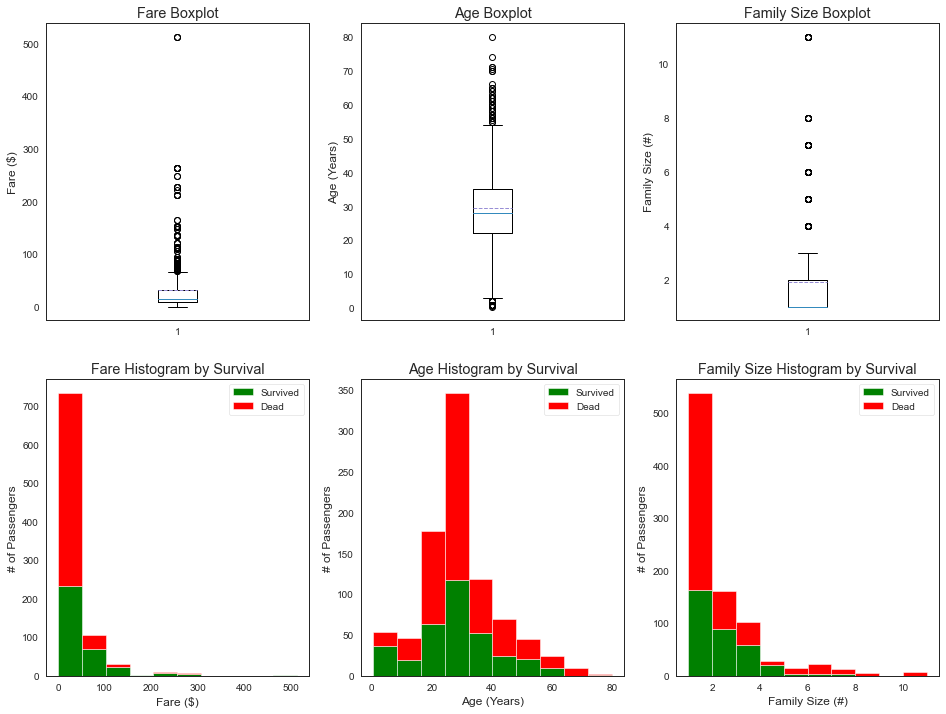

In [56]:
#IMPORTANT: Intentionally plotted different ways for learning purposes only. 

#optional plotting w/pandas: https://pandas.pydata.org/pandas-docs/stable/visualization.html

#we will use matplotlib.pyplot: https://matplotlib.org/api/pyplot_api.html

#to organize our graphics will use figure: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
#subplot: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html#matplotlib.pyplot.subplot
#and subplotS: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html?highlight=matplotlib%20pyplot%20subplots#matplotlib.pyplot.subplots

#graph distribution of quantitative data
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=data1['Fare'], showmeans = True, meanline = True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(232)
plt.boxplot(data1['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(233)
plt.boxplot(data1['FamilySize'], showmeans = True, meanline = True)
plt.title('Family Size Boxplot')
plt.ylabel('Family Size (#)')

plt.subplot(234)
plt.hist(x = [data1[data1['Survived']==1]['Fare'], data1[data1['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(235)
plt.hist(x = [data1[data1['Survived']==1]['Age'], data1[data1['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(236)
plt.hist(x = [data1[data1['Survived']==1]['FamilySize'], data1[data1['Survived']==0]['FamilySize']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size (#)')
plt.ylabel('# of Passengers')
plt.legend()

<AxesSubplot:xlabel='FamilySize', ylabel='Survived'>

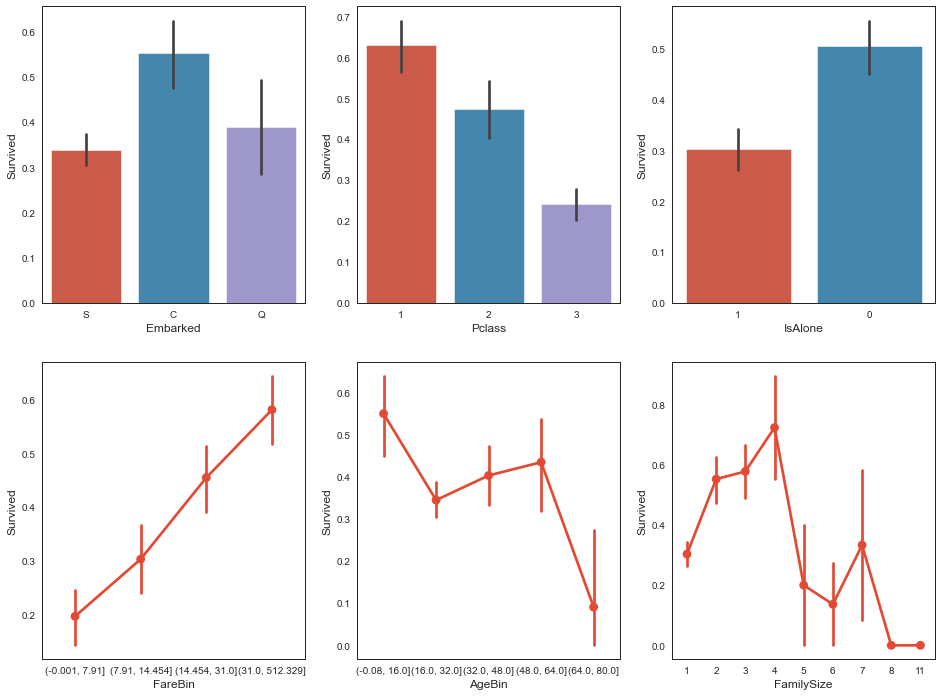

In [57]:
#we will use seaborn graphics for multi-variable comparison: https://seaborn.pydata.org/api.html

#graph individual features by survival
fig, saxis = plt.subplots(2, 3,figsize=(16,12))

sns.barplot(x = 'Embarked', y = 'Survived', data=data1, ax = saxis[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=data1, ax = saxis[0,1])
sns.barplot(x = 'IsAlone', y = 'Survived', order=[1,0], data=data1, ax = saxis[0,2])

sns.pointplot(x = 'FareBin', y = 'Survived',  data=data1, ax = saxis[1,0])
sns.pointplot(x = 'AgeBin', y = 'Survived',  data=data1, ax = saxis[1,1])
sns.pointplot(x = 'FamilySize', y = 'Survived', data=data1, ax = saxis[1,2])

Text(0.5, 1.0, 'Pclass vs Family Size Survival Comparison')

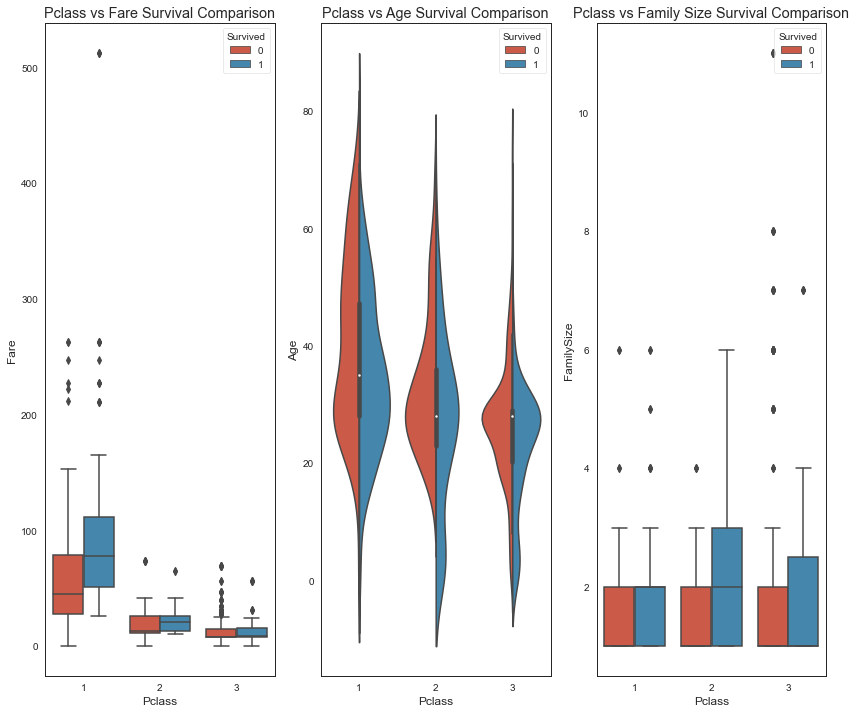

In [58]:
#graph distribution of qualitative data: Pclass
#we know class mattered in survival, now let's compare class and a 2nd feature
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(14,12))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = data1, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = data1, split = True, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass', y ='FamilySize', hue = 'Survived', data = data1, ax = axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

Text(0.5, 1.0, 'Sex vs IsAlone Survival Comparison')

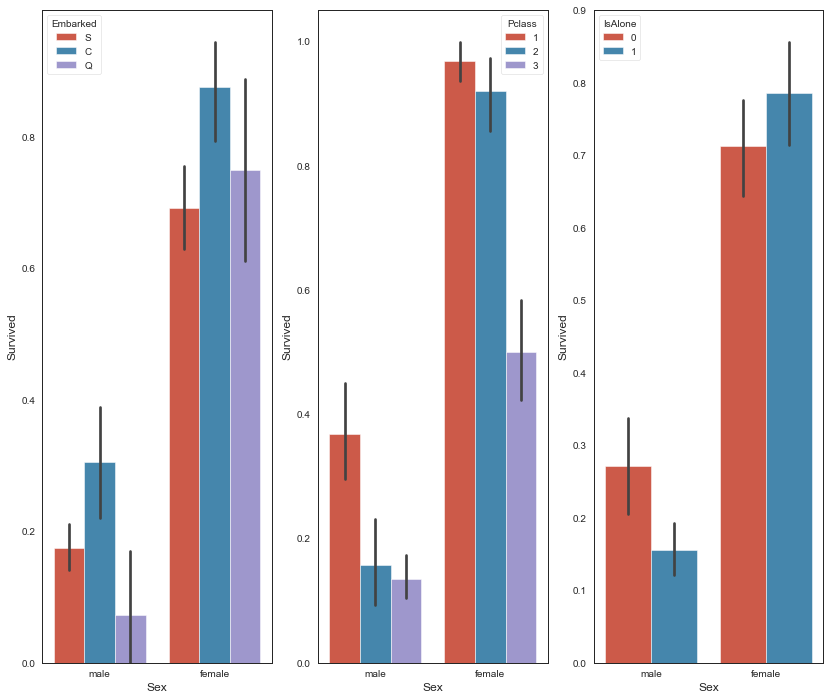

In [59]:
#graph distribution of qualitative data: Sex
#we know sex mattered in survival, now let's compare sex and a 2nd feature
fig, qaxis = plt.subplots(1,3,figsize=(14,12))

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=data1, ax = qaxis[0])
axis1.set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=data1, ax  = qaxis[1])
axis1.set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'IsAlone', data=data1, ax  = qaxis[2])
axis1.set_title('Sex vs IsAlone Survival Comparison')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

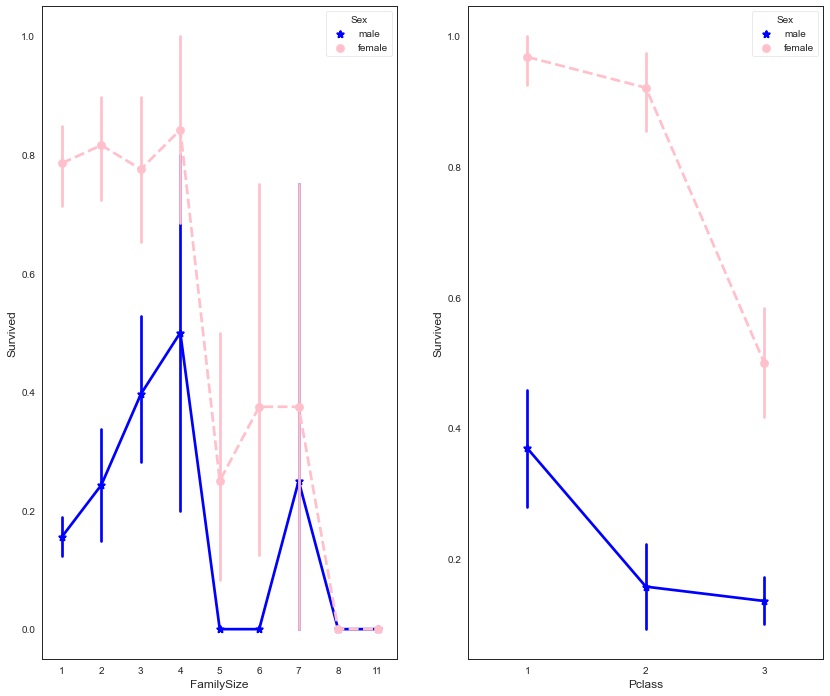

In [60]:
#more side-by-side comparisons
fig, (maxis1, maxis2) = plt.subplots(1, 2,figsize=(14,12))

#how does family size factor with sex & survival compare
sns.pointplot(x="FamilySize", y="Survived", hue="Sex", data=data1,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis1)

#how does class factor with sex & survival compare
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data1,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis2)

C:\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


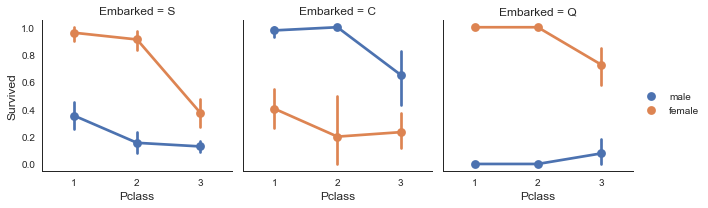

In [61]:
#how does embark port factor with class, sex, and survival compare
#facetgrid: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
e = sns.FacetGrid(data1, col = 'Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette = 'deep')
e.add_legend()

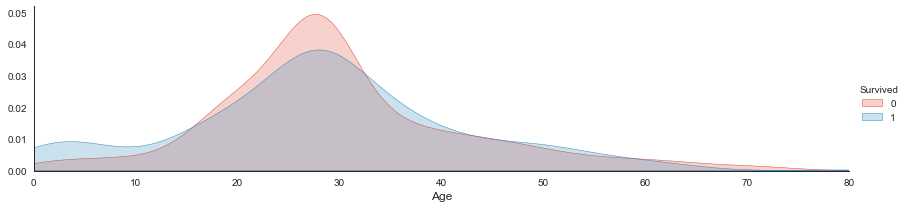

In [62]:
#plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid( data1, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , data1['Age'].max()))
a.add_legend()

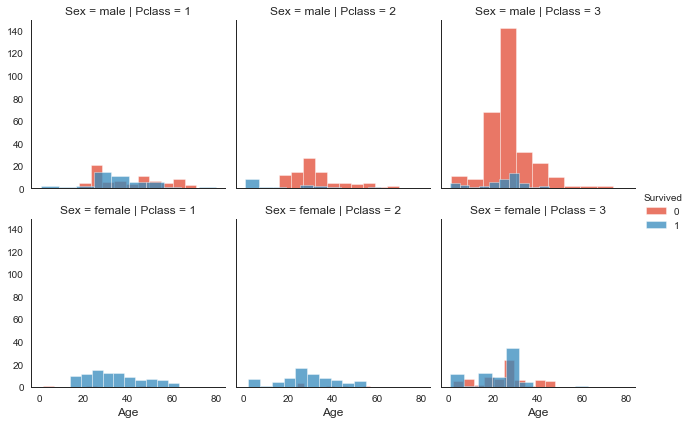

In [63]:
#histogram comparison of sex, class, and age by survival
h = sns.FacetGrid(data1, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()

C:\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


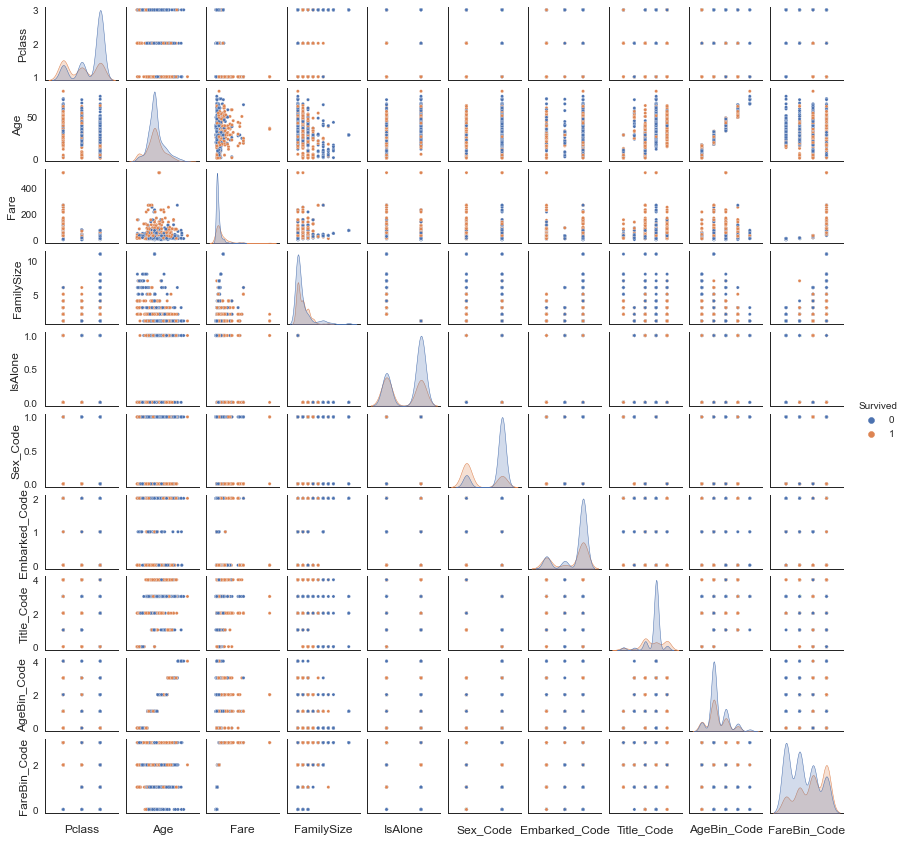

In [64]:
#pair plots of entire dataset
pp = sns.pairplot(data1, hue = 'Survived', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

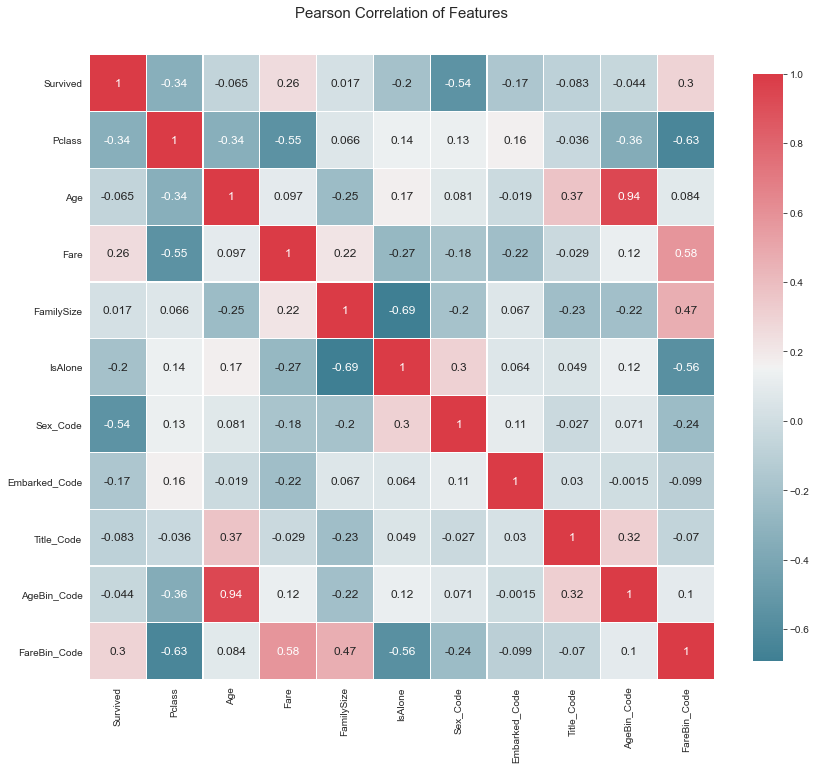

In [65]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data1)

# 4. Model Generator and Training

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import svm
import numpy as np

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

k_fold = KFold(n_splits=10, shuffle=True)



# 5. Accuracy Measure

In [67]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    XGBClassifier()    
    ]



#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = data1[Target]

#index through MLA and save performance to table
row_index = 0



for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    # 
    cv_results = model_selection.cross_validate(alg, data1[data1_x_bin], data1[Target], cv  = cv_split,return_train_score=True)
    

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(data1[data1_x_bin], data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])
    
    row_index+=1

MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

[05:36:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:36:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:36:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:36:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.895131,0.832090,0.060902,0.153512
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.835206,0.827612,0.040916,0.031216
21,XGBClassifier,"{'objective': 'binary:logistic', 'use_label_en...",0.890449,0.826493,0.061770,0.080585
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.834082,0.826119,0.045663,0.037600
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.895131,0.824254,0.059749,0.118483
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.866667,0.822761,0.049873,0.077194
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.888951,0.820522,0.060167,0.021941
17,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.895131,0.820149,0.049254,0.004887
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.850375,0.813806,0.069086,0.004488
18,ExtraTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.895131,0.812687,0.078805,0.003990


In [68]:
a = MLA_compare[MLA_compare['MLA Name'] == 'SVC']
a

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.835206,0.827612,0.040916,0.031216


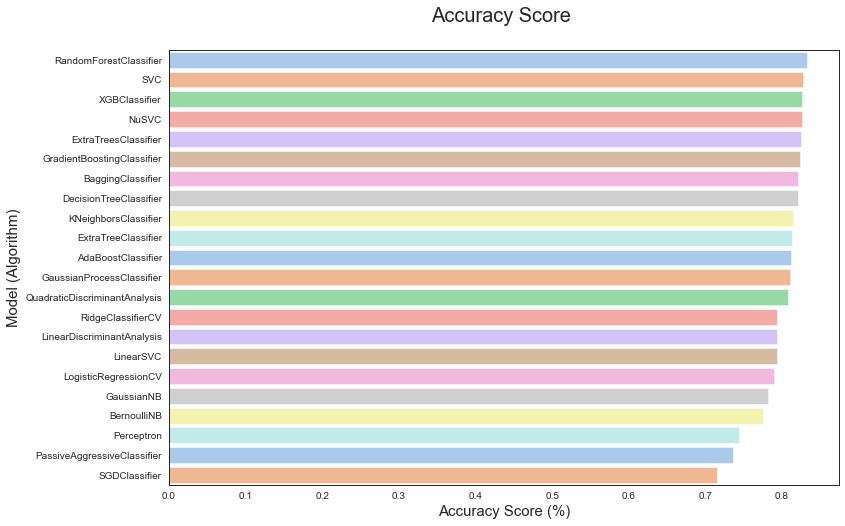

In [69]:
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm', palette = 'pastel')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Accuracy Score \n', fontsize=20)
plt.xlabel('Accuracy Score (%)', fontsize= 15)
plt.ylabel('Model (Algorithm)', fontsize= 15)
plt.show()

### SVM Model

In [70]:
# SVM
params = {'C':[1,4.5,5,5.5,6,7],'gamma':[0.01,0.09,0.1,0.11,0.5,1]}

svm_clf = GridSearchCV(svm.SVC(kernel='rbf'), params, cv=4, refit=True)
svm_clf.fit(train1_x,train1_y)

GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'C': [1, 4.5, 5, 5.5, 6, 7],
                         'gamma': [0.01, 0.09, 0.1, 0.11, 0.5, 1]})

In [71]:
print('최적 파라미터:',svm_clf.best_params_)
print('best score:',svm_clf.best_score_)
svm_estimator = svm_clf.best_estimator_
print(svm_estimator)

최적 파라미터: {'C': 5.5, 'gamma': 0.01}
best score: 0.7470059880239521
SVC(C=5.5, gamma=0.01)


### Randomforest Model

In [72]:
# Randomforest
params = {'max_depth':[4,5,6],'min_samples_leaf':[1,2,3],'min_samples_split':[20,25,30,40]}

rf_clf = GridSearchCV(RandomForestClassifier(n_estimators=140), params, cv=5, refit=True)
rf_clf.fit(train1_x,train1_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=140),
             param_grid={'max_depth': [4, 5, 6], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [20, 25, 30, 40]})

# 6. Inference Test Prediction

# 7. Submit

In [ ]:
data1[Target]['Survived']

In [ ]:
# Create a csv file to submit to the kaggle

submission = pd.DataFrame({
    'PassengerId' : train['PassengerId'],
    'Survived' : data1[Target]['Survived']
})

submission.to_csv('submission.csv',index=False)

# 